In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

from model_methods import mu, R0, h, model

Reproduction number R0= 0.9956709956709958
Globally asymptotically stable if beta <=d+nu+mu0. This is False


<ipython-input-29-e65bbe191aa3>:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax = plt.subplots(1,3,figsize=(15,5))


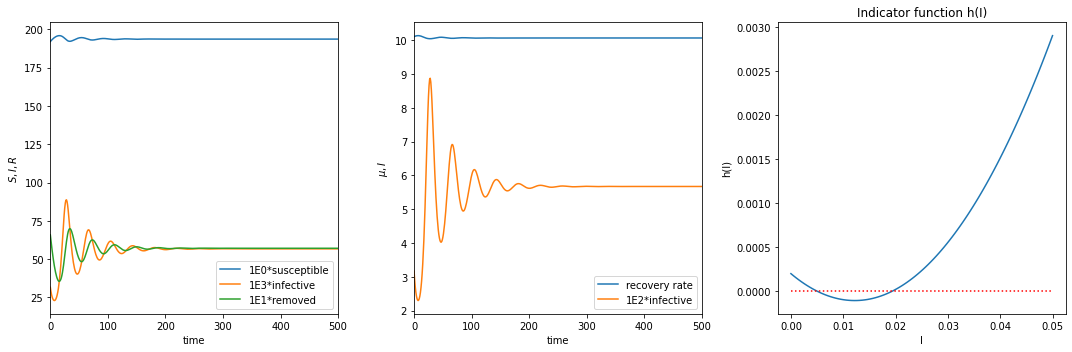

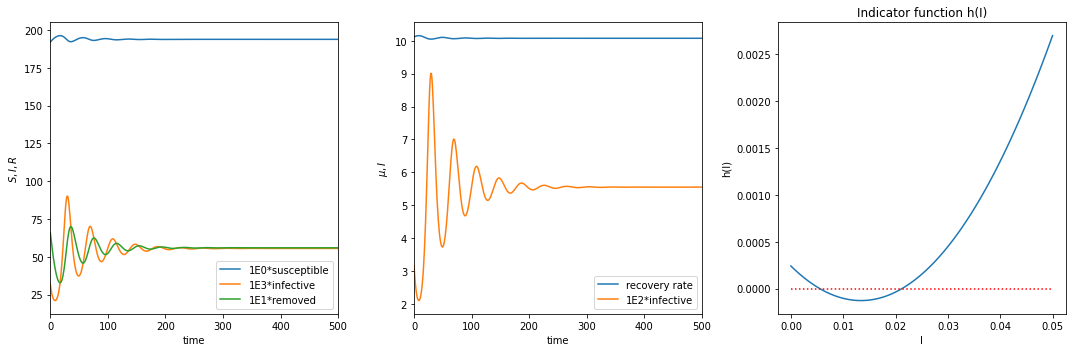

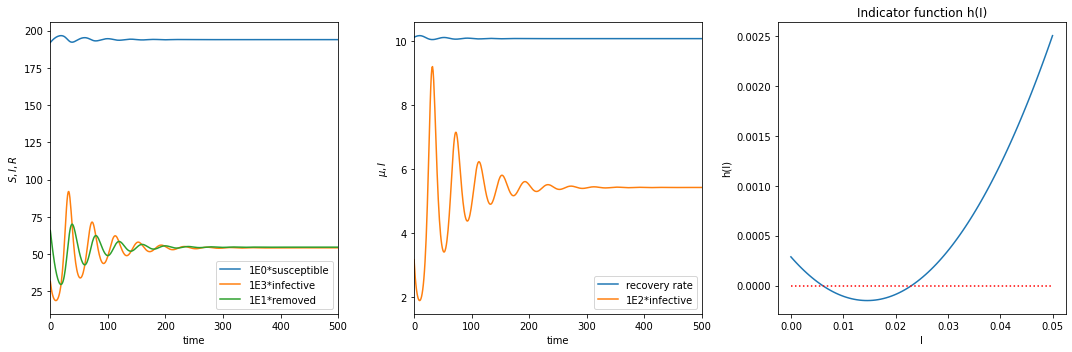

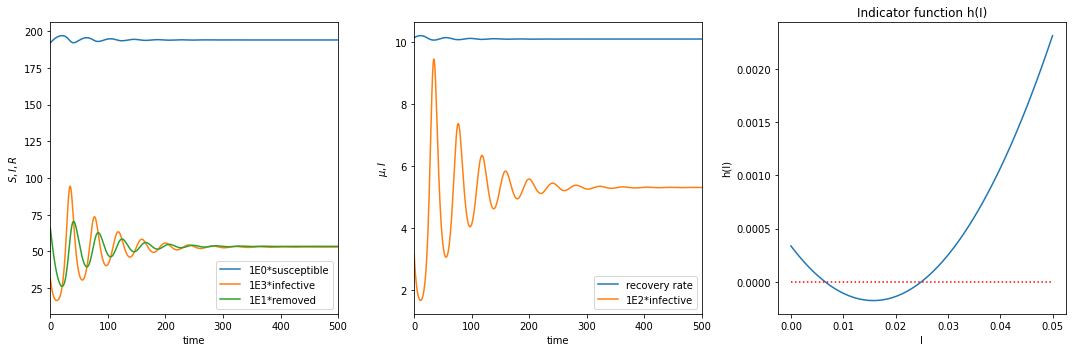

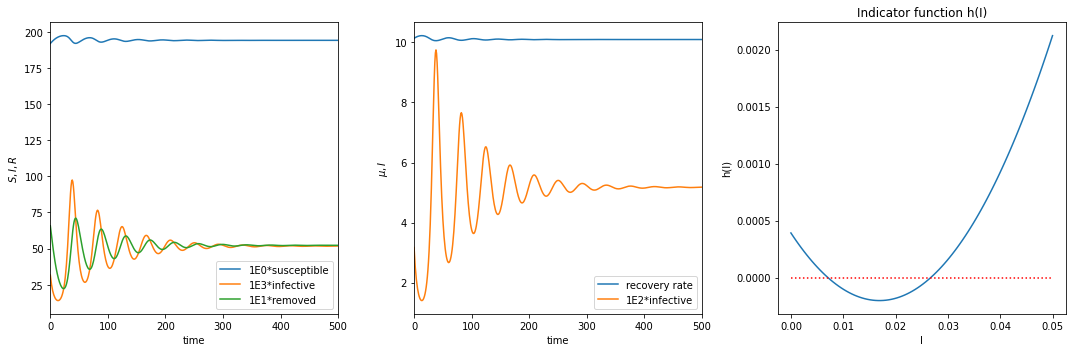

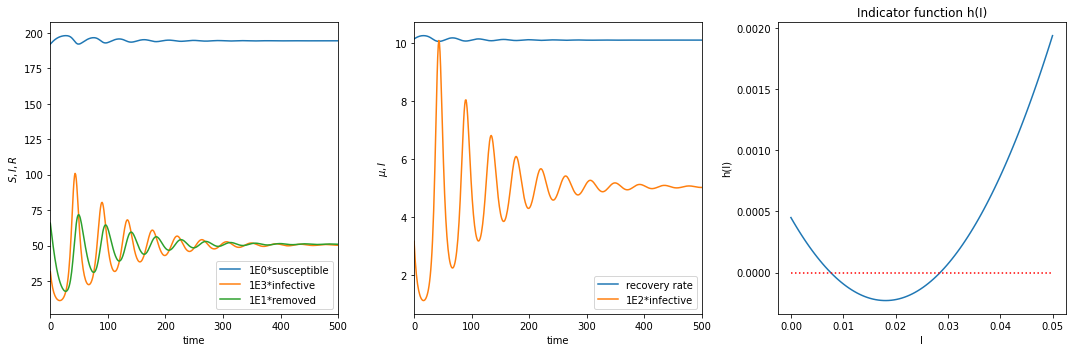

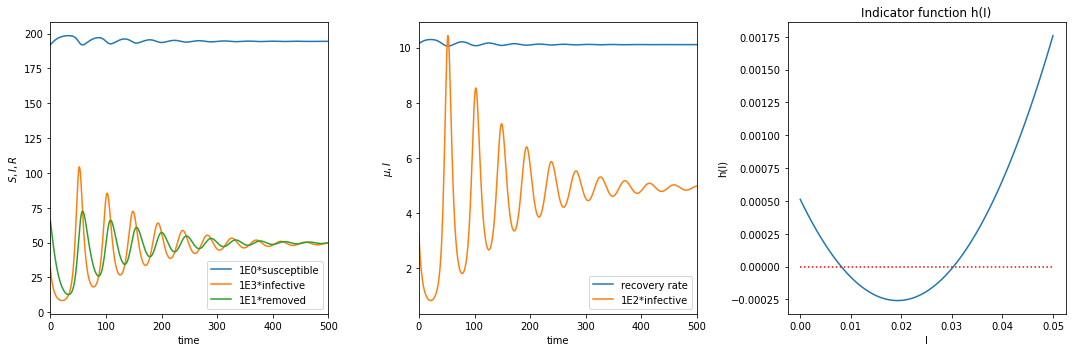

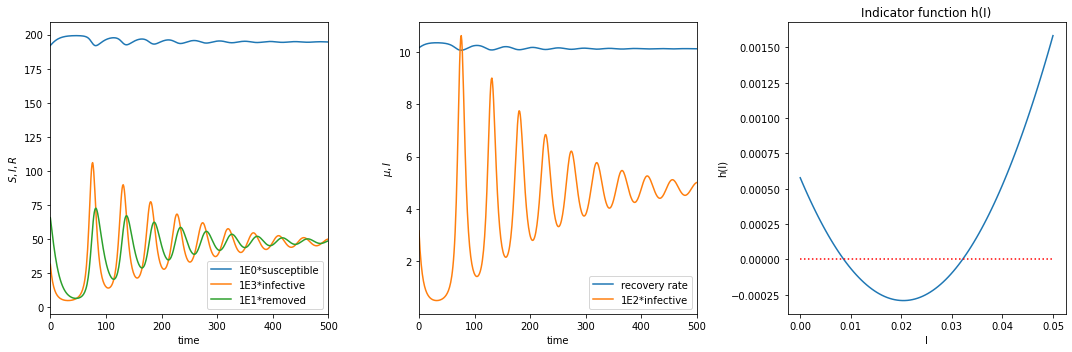

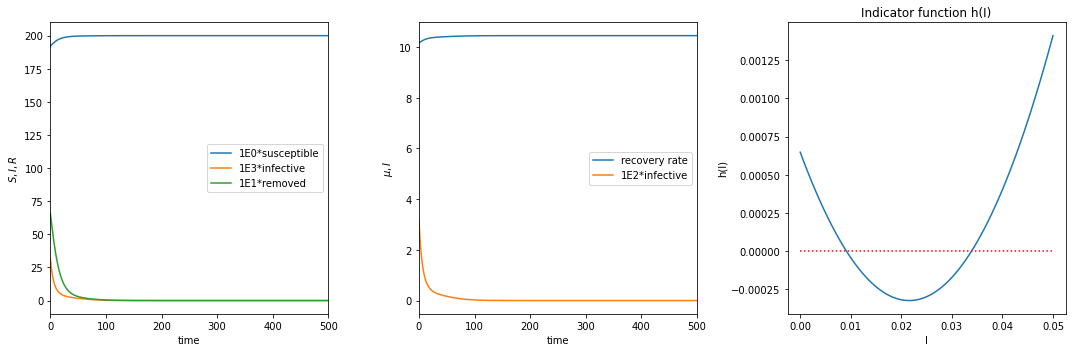

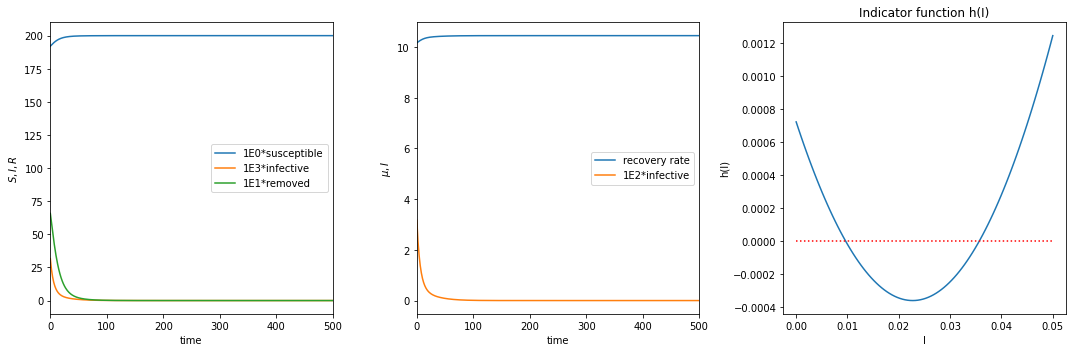

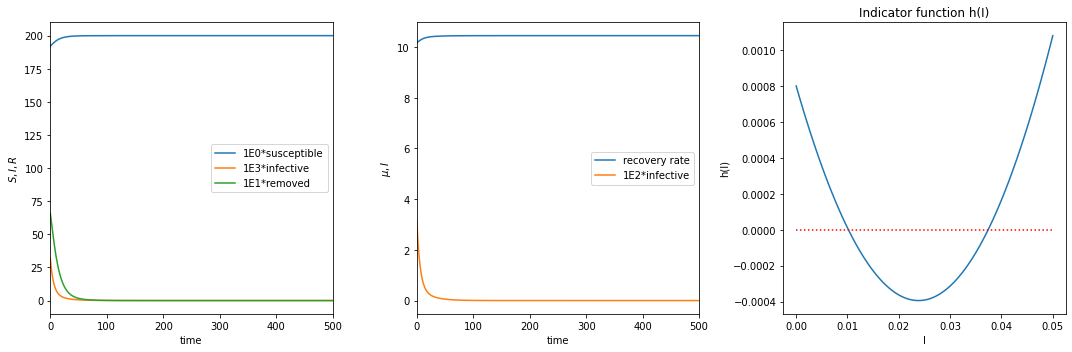

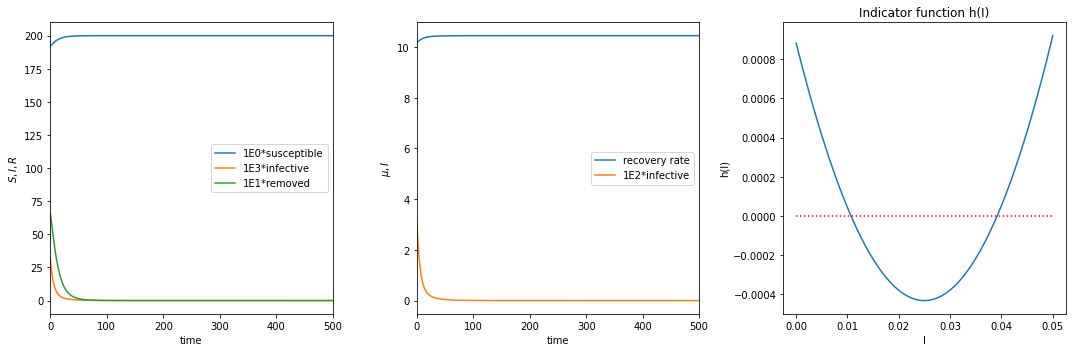

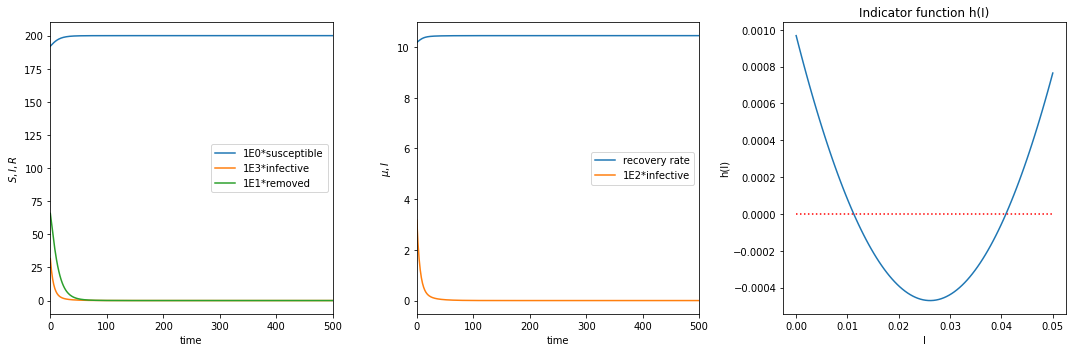

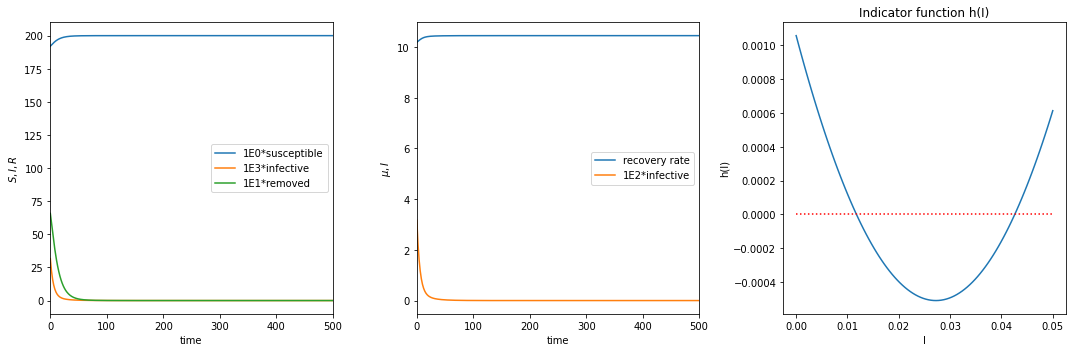

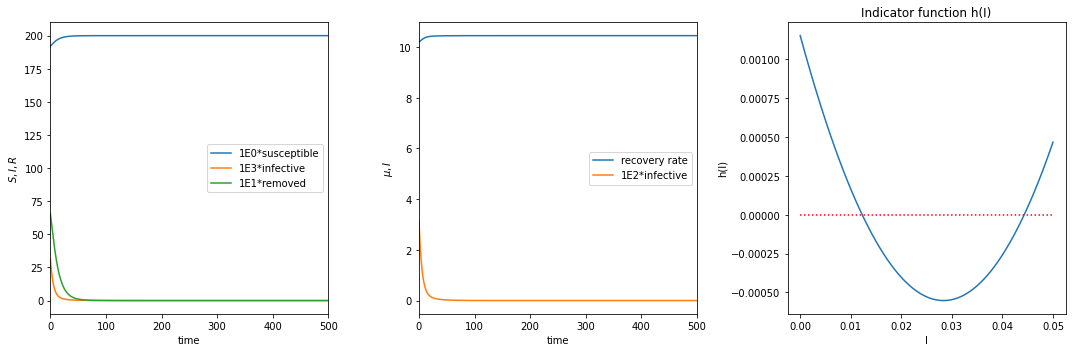

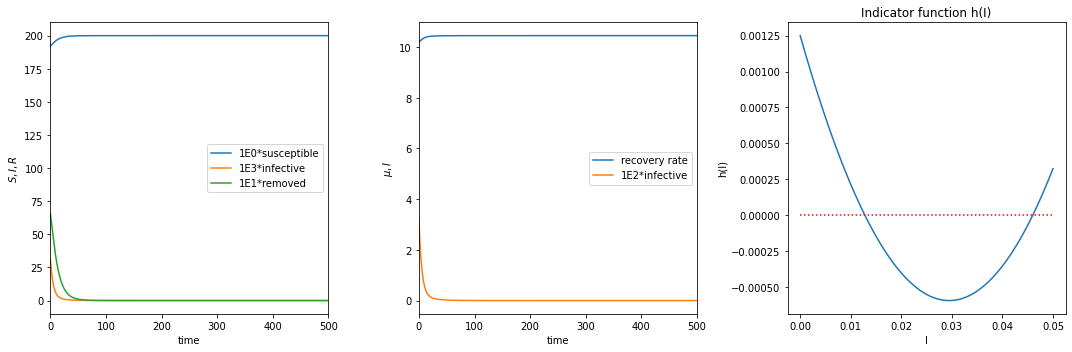

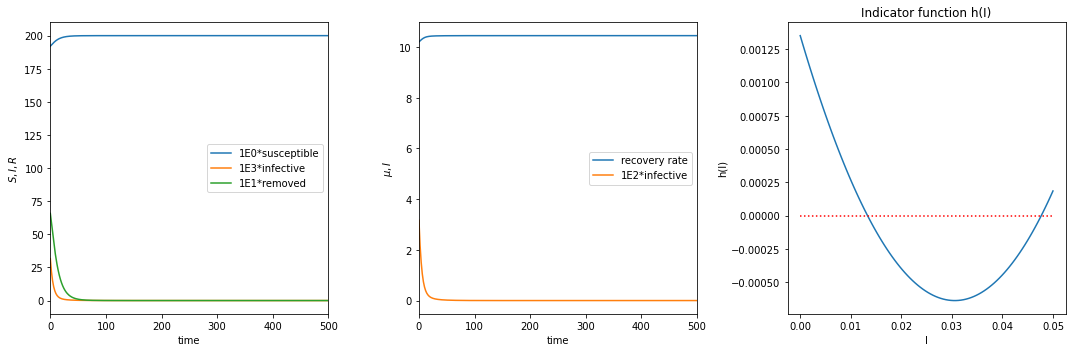

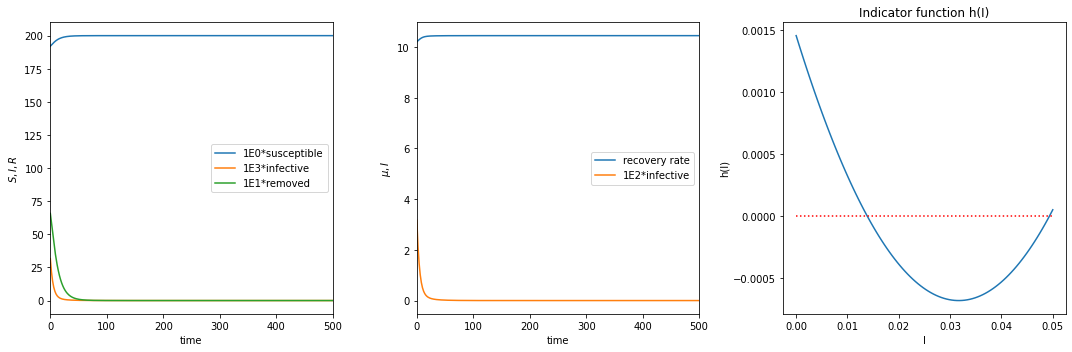

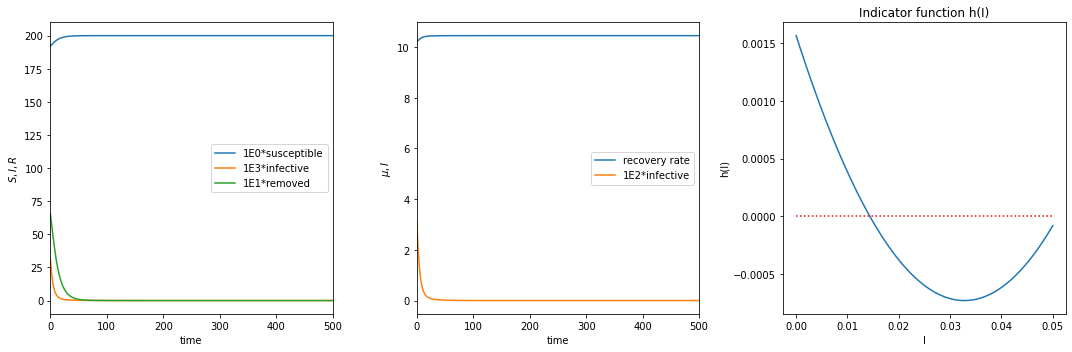

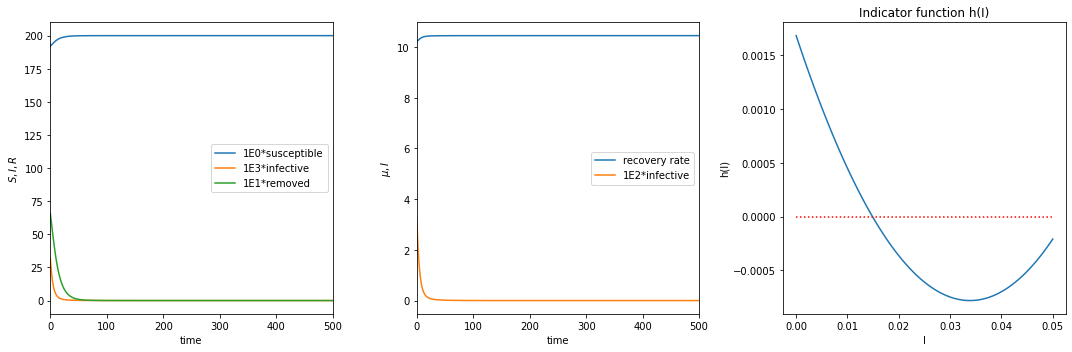

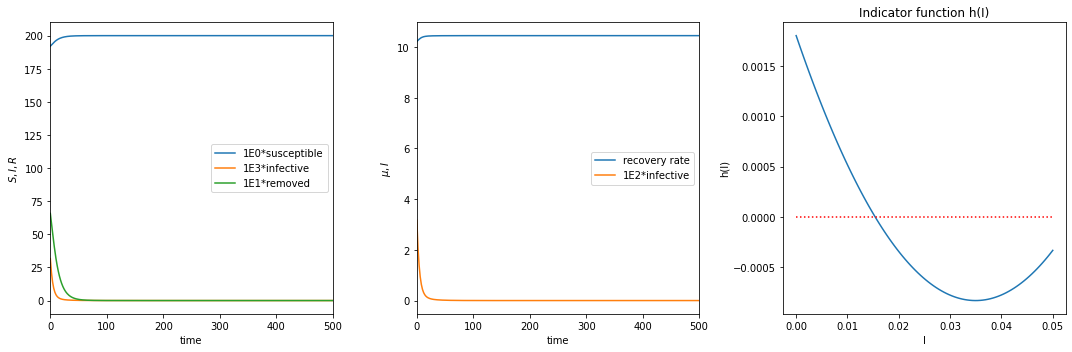

In [29]:
# parameters
random_state = 12345
t_0 = 0
t_end = 1000
NT = t_end-t_0
# if these error tolerances are set too high, the solution will be qualitatively (!) wrong
rtol=1e-8
atol=1e-8

# SIR model parameters
beta=11.5
A=20
d=0.1
nu=1
b=0.01 # try to set this to 0.01, 0.020, ..., 0.022, ..., 0.03
mu0 = 10   # minimum recovery rate
mu1 = 10.45  # maximum recovery rate

# information
print("Reproduction number R0=", R0(beta, d, nu, mu1))
print('Globally asymptotically stable if beta <=d+nu+mu0. This is', beta <= d+nu+mu0)

for b in np.linspace(0.01,0.03,21):
    # simulation
    rng = np.random.default_rng(random_state)

    SIM0 = rng.uniform(low=(190, 0, 1), high=(199,0.1,8), size=(3,))

    time = np.linspace(t_0,t_end,NT)
    sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='LSODA', rtol=rtol, atol=atol)

    fig,ax = plt.subplots(1,3,figsize=(15,5))
    ax[0].plot(sol.t, sol.y[0]-0*sol.y[0][0], label='1E0*susceptible');
    ax[0].plot(sol.t, 1e3*sol.y[1]-0*sol.y[1][0], label='1E3*infective');
    ax[0].plot(sol.t, 1e1*sol.y[2]-0*sol.y[2][0], label='1E1*removed');
    ax[0].set_xlim([0, 500])
    ax[0].legend();
    ax[0].set_xlabel("time")
    ax[0].set_ylabel(r"$S,I,R$")

    ax[1].plot(sol.t, mu(b, sol.y[1], mu0, mu1), label='recovery rate')
    ax[1].plot(sol.t, 1e2*sol.y[1], label='1E2*infective');
    ax[1].set_xlim([0, 500])
    ax[1].legend();
    ax[1].set_xlabel("time")
    ax[1].set_ylabel(r"$\mu,I$")

    I_h = np.linspace(-0.,0.05,100)
    ax[2].plot(I_h, h(I_h, mu0, mu1, beta, A, d, nu, b));
    ax[2].plot(I_h, 0*I_h, 'r:')
    #ax[2].set_ylim([-0.1,0.05])
    ax[2].set_title("Indicator function h(I)")
    ax[2].set_xlabel("I")
    ax[2].set_ylabel("h(I)")

    fig.tight_layout()
    fig.savefig("task5_figures/graphs_b_{}.png".format(b))

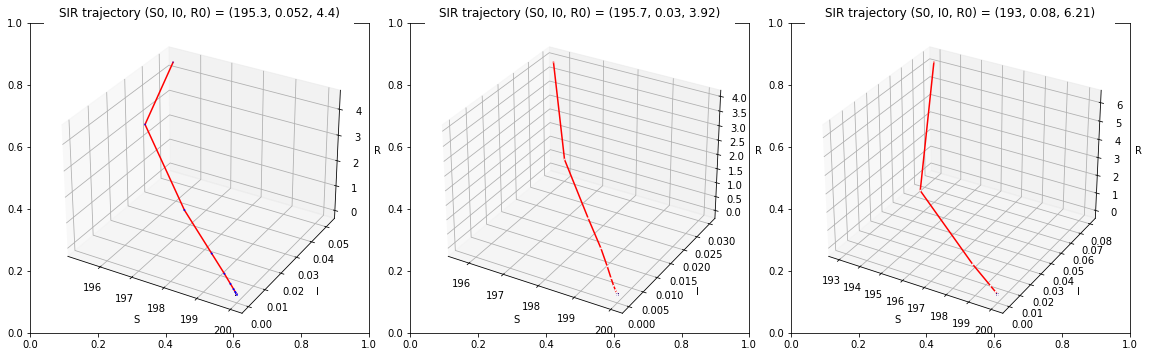

In [25]:
for b in np.linspace(0.01,0.03,21):

    fig,ax = plt.subplots(1,3,figsize=(16,5))

    ax[0]=fig.add_subplot(131,projection="3d")
    ax[1]=fig.add_subplot(132,projection="3d")
    ax[2]=fig.add_subplot(133,projection="3d")
    time = np.linspace(t_0,15000,NT)

    cmap = ["BuPu", "Purples", "bwr"][1]

    SIM0 = [195.3, 0.052, 4.4] # what happens with this initial condition when b=0.022? -- it progresses VERY slowly. Needs t_end to be super large.
    sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
    ax[0].plot(sol.y[0], sol.y[1], sol.y[2], 'r-')
    ax[0].scatter(sol.y[0], sol.y[1], sol.y[2], s=1, c=time, cmap='bwr')

    SIM0 = [195.7, 0.03, 3.92] # what happens with this initial condition when b=0.022?
    sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
    ax[1].plot(sol.y[0], sol.y[1], sol.y[2], 'r-')
    ax[1].scatter(sol.y[0], sol.y[1], sol.y[2], s=1, c=time, cmap=cmap)

    SIM0 = [193, 0.08, 6.21] # what happens with this initial condition when b=0.022?
    sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
    ax[2].plot(sol.y[0], sol.y[1], sol.y[2], 'r-')
    ax[2].scatter(sol.y[0], sol.y[1], sol.y[2], s=1, c=time, cmap=cmap)

    ax[0].set_xlabel("S")
    ax[0].set_ylabel("I")
    ax[0].set_zlabel("R")
    ax[1].set_xlabel("S")
    ax[1].set_ylabel("I")
    ax[1].set_zlabel("R")
    ax[2].set_xlabel("S")
    ax[2].set_ylabel("I")
    ax[2].set_zlabel("R")

    ax[0].set_title("SIR trajectory (S0, I0, R0) = (195.3, 0.052, 4.4)")
    ax[1].set_title("SIR trajectory (S0, I0, R0) = (195.7, 0.03, 3.92)")
    ax[2].set_title("SIR trajectory (S0, I0, R0) = (193, 0.08, 6.21)")

    fig.tight_layout()
    fig.savefig("task5_figures/traj_b_{}.png".format(b))

Reproduction number R0= 1.0000000000000002
Globally asymptotically stable if beta <=d+nu+mu0. This is False


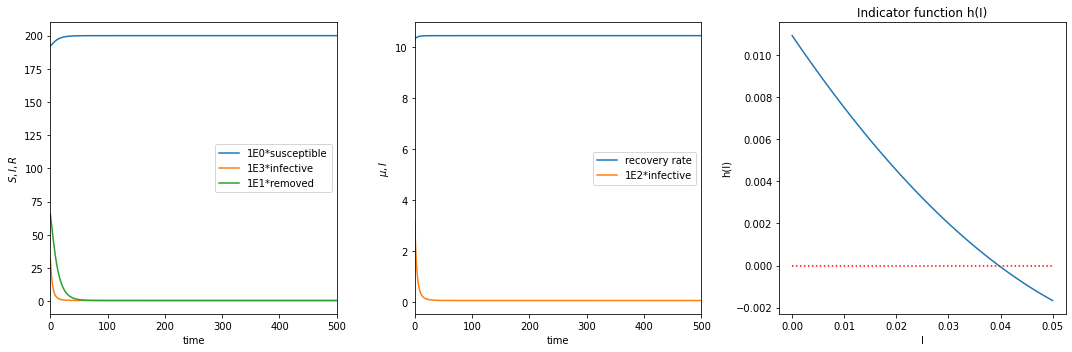

In [38]:
# parameters
random_state = 12345
t_0 = 0
t_end = 1000
NT = t_end-t_0
# if these error tolerances are set too high, the solution will be qualitatively (!) wrong
rtol=1e-8
atol=1e-8

# SIR model parameters to create a pitchfork bifurcation
beta=11.55
A=20
d=0.1
nu=1
b=0.07385978949
mu0 = 10   # minimum recovery rate
mu1 = 10.45  # maximum recovery rate

# information
print("Reproduction number R0=", R0(beta, d, nu, mu1))
print('Globally asymptotically stable if beta <=d+nu+mu0. This is', beta <= d+nu+mu0)

# simulation
rng = np.random.default_rng(random_state)

SIM0 = rng.uniform(low=(190, 0, 1), high=(199,0.1,8), size=(3,))

time = np.linspace(t_0,t_end,NT)
sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='LSODA', rtol=rtol, atol=atol)

fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(sol.t, sol.y[0]-0*sol.y[0][0], label='1E0*susceptible');
ax[0].plot(sol.t, 1e3*sol.y[1]-0*sol.y[1][0], label='1E3*infective');
ax[0].plot(sol.t, 1e1*sol.y[2]-0*sol.y[2][0], label='1E1*removed');
ax[0].set_xlim([0, 500])
ax[0].legend();
ax[0].set_xlabel("time")
ax[0].set_ylabel(r"$S,I,R$")

ax[1].plot(sol.t, mu(b, sol.y[1], mu0, mu1), label='recovery rate')
ax[1].plot(sol.t, 1e2*sol.y[1], label='1E2*infective');
ax[1].set_xlim([0, 500])
ax[1].legend();
ax[1].set_xlabel("time")
ax[1].set_ylabel(r"$\mu,I$")

I_h = np.linspace(-0.,0.05,100)
ax[2].plot(I_h, h(I_h, mu0, mu1, beta, A, d, nu, b));
ax[2].plot(I_h, 0*I_h, 'r:')
#ax[2].set_ylim([-0.1,0.05])
ax[2].set_title("Indicator function h(I)")
ax[2].set_xlabel("I")
ax[2].set_ylabel("h(I)")

fig.tight_layout()
fig.savefig("task5_figures/graphs_b_{}.png".format(b))

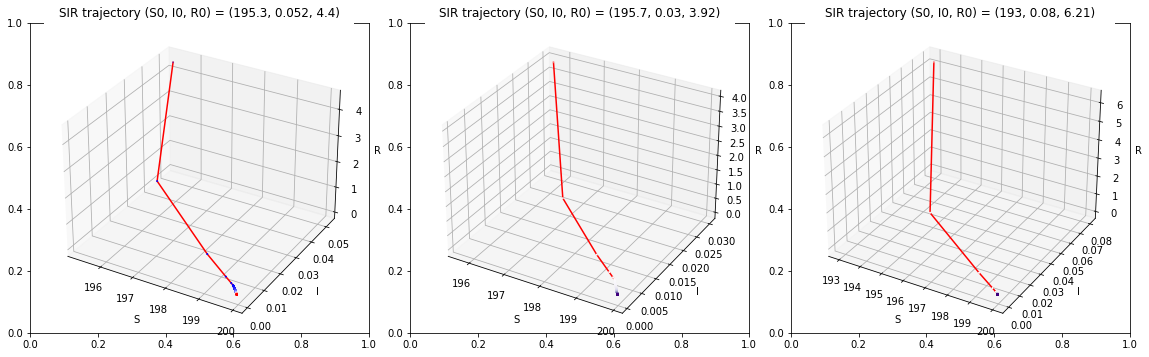

In [37]:
# parameters
random_state = 12345
t_0 = 0
t_end = 1000
NT = t_end-t_0
# if these error tolerances are set too high, the solution will be qualitatively (!) wrong
rtol=1e-8
atol=1e-8

# SIR model parameters to create a pitchfork bifurcation
beta=11.55
A=20
d=0.1
nu=1
b=0.07385978949
mu0 = 10   # minimum recovery rate
mu1 = 10.45  # maximum recovery rate


fig,ax = plt.subplots(1,3,figsize=(16,5))

ax[0]=fig.add_subplot(131,projection="3d")
ax[1]=fig.add_subplot(132,projection="3d")
ax[2]=fig.add_subplot(133,projection="3d")
time = np.linspace(t_0,15000,NT)

cmap = ["BuPu", "Purples", "bwr"][1]

SIM0 = [195.3, 0.052, 4.4] # what happens with this initial condition when b=0.022? -- it progresses VERY slowly. Needs t_end to be super large.
sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
ax[0].plot(sol.y[0], sol.y[1], sol.y[2], 'r-')
ax[0].scatter(sol.y[0], sol.y[1], sol.y[2], s=1, c=time, cmap='bwr')

SIM0 = [195.7, 0.03, 3.92] # what happens with this initial condition when b=0.022?
sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
ax[1].plot(sol.y[0], sol.y[1], sol.y[2], 'r-')
ax[1].scatter(sol.y[0], sol.y[1], sol.y[2], s=1, c=time, cmap=cmap)

SIM0 = [193, 0.08, 6.21] # what happens with this initial condition when b=0.022?
sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
ax[2].plot(sol.y[0], sol.y[1], sol.y[2], 'r-')
ax[2].scatter(sol.y[0], sol.y[1], sol.y[2], s=1, c=time, cmap=cmap)

ax[0].set_xlabel("S")
ax[0].set_ylabel("I")
ax[0].set_zlabel("R")
ax[1].set_xlabel("S")
ax[1].set_ylabel("I")
ax[1].set_zlabel("R")
ax[2].set_xlabel("S")
ax[2].set_ylabel("I")
ax[2].set_zlabel("R")

ax[0].set_title("SIR trajectory (S0, I0, R0) = (195.3, 0.052, 4.4)")
ax[1].set_title("SIR trajectory (S0, I0, R0) = (195.7, 0.03, 3.92)")
ax[2].set_title("SIR trajectory (S0, I0, R0) = (193, 0.08, 6.21)")

fig.tight_layout()
fig.savefig("task5_figures/pitchfork_bif_3d.png")